In [ ]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(x):
  return 3*x**2 - 4*x + 5

In [3]:
f(3.0)

20.0

In [12]:
xs = np.arange(-5, 5, 0.25) # set of x from -5 to 5 in steps of .25
xs

array([-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  ,
       -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75,
       -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
        1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,
        4.  ,  4.25,  4.5 ,  4.75])

In [13]:
ys = f(xs)
ys

array([100.    ,  91.6875,  83.75  ,  76.1875,  69.    ,  62.1875,
        55.75  ,  49.6875,  44.    ,  38.6875,  33.75  ,  29.1875,
        25.    ,  21.1875,  17.75  ,  14.6875,  12.    ,   9.6875,
         7.75  ,   6.1875,   5.    ,   4.1875,   3.75  ,   3.6875,
         4.    ,   4.6875,   5.75  ,   7.1875,   9.    ,  11.1875,
        13.75  ,  16.6875,  20.    ,  23.6875,  27.75  ,  32.1875,
        37.    ,  42.1875,  47.75  ,  53.6875])

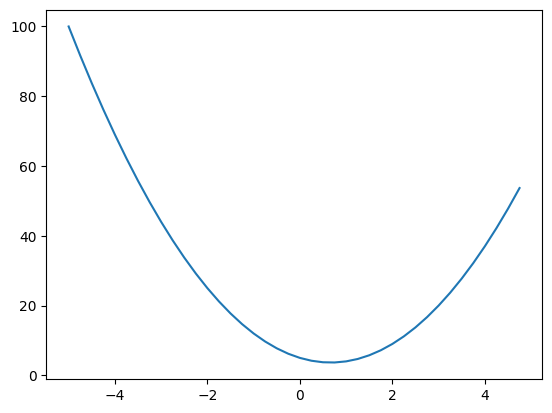

In [14]:
plt.plot(xs, ys)

In [37]:
# derivative of y using definition of derivative
h = 0.000001
x = 3.0
(f(x+h) - f(x))/h

14.000003002223593

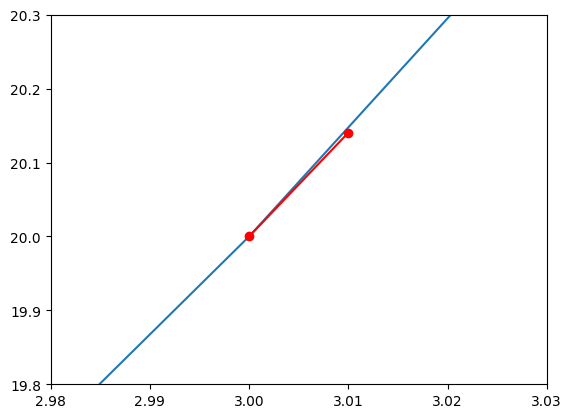

In [40]:
# visualization of the two points f(x+h) and f(x) and a red line between them to show slope (derivative)
h_test = 0.01
x1 = x
y1 = f(x)
x2 = x+h_test
y2 = f(x+h_test)

plt.plot(xs, ys)
plt.plot([x1, x2], [y1, y2], 'ro-')
plt.xlim([2.98, 3.03])
plt.ylim([19.8, 20.3])
plt.show()

In [41]:
# more complex
a = 2.0
b = -3.0
c = 10.0
d = a * b + c
print(d)

4.0


In [44]:
# kinda like above but instead of just adding h to the input, a specific input variable (a) is bumped to see how the slope (derivative) changes
h = 0.0001

a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
a += h
d2 = a*b + c

print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1)/h)

d1 4.0
d2 3.999699999999999
slope -3.000000000010772


neural networks

In [12]:
# value object (data structure to maintain the nn)

class Value:
  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data
    self.grad = 0.0 # 0 means no effect (it has no impact on the output)
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other):
    out = Value(self.data + other.data, (self, other), '+')
    return out

  def __mul__(self, other):
    out = Value(self.data * other.data, (self, other), '*')
    return out

  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out = Value(t, (self, ), 'tanh')
    return out

a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
d = a * b; d.label='d'
e = c + d; e.label='e'
f = Value(-2.0, label='f')
L = e * f; L.label='L'
L

Value(data=-8.0)

In [137]:
# manually testing for understanding

print("children of d are: " + str(d._prev))
print("operation that created the value: " + d._op)

def test_grad():
  h = 0.0000001

  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0, label='c')
  d = a * b; d.label='d'
  e = c + d; e.label='e'
  f = Value(-2.0, label='f')
  L = e * f; L.label='L'
  L1 = L.data

  # add h to the value to get the gradient for that node

  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0, label='c')
  d = a * b; d.label='d'
  e = c + d; e.label='e'
  f = Value(-2.0, label='f')
  L = e * f; L.label='L'
  L2 = L.data + h

  print((L2 - L1)/h)

test_grad()

# notes:
# when backpropagating, plus node's local derivatives are 1, therefore they kinda "route" the derivative to the next node

children of d are: {Value(data=2.0), Value(data=-3.0)}
operation that created the value: *
1.0000000028043132


In [147]:
L.grad = 1.0
f.grad = 4.0
e.grad = -2.0
d.grad = -2.0
c.grad = -2.0
b.grad = -4.0
a.grad = 6.0

In [5]:
from graphviz import Digraph

# uses graphviz for visualization

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

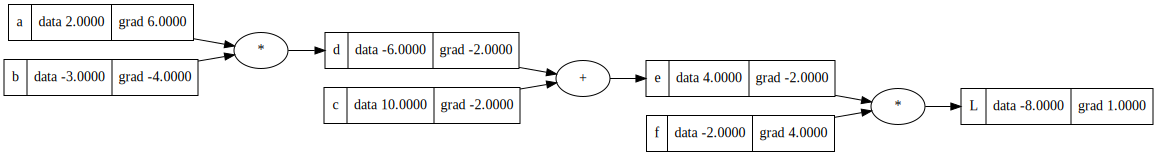

In [148]:
draw_dot(L)

# a- f are like the weights, they effect the L (loss function kinda)

**manual back propagation:**

L.grad = dL / dL = 1

f.grad = dL / df = d(e * f) / df = { e * f^0 } = e = e.data = 4

e.grad = dL / de = d(e * f) / de = f = f.data = -2

c.grad = dL / dc = ( dL / de ) * ( de / dc ) = { using chain rule. we also know that dL / de = -2 from the above } = ( -2 ) * ( de / dc ) = { e = c+d } = ( -2 ) * ( d(c + d) / dc ) = -2 * 1 = -2

(note to remember chain rule: "If a car travels twice as fast as a bicycle and the bicycle is four times as fast as a walking man, then the car travels 2 × 4 = 8 times as fast as the man". so the car's speed relative to the bicycle relative to the walking man)

d.grad = dL / dd = ( dL / de ) * ( de / dd ) = ( -2 ) * ( d(d + c) / dd ) = -2 * 1 = -2

b.grad = dL / db = ( dL / dd ) * ( dd / db ) = { d = a*b } = ( -2 ) * ( d(a*b) / db ) = -2 * a = -2 * 2 = -4

a.grad = dL / da = ( dL / dd ) * ( dd / da ) = -2 * b = -2 * -3 = 6

In [149]:
# test: nudging variables (positive direction) to make L go up
# only on leaf nodes

a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad

d = a * b
e = c + d
L = e * f
L.data

-7.286496

back progatagtion example 2 through a neuron

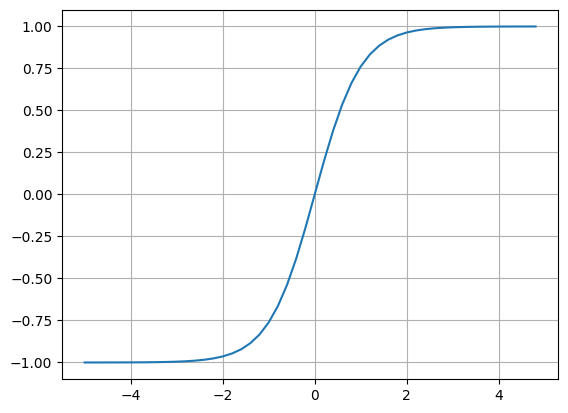

In [3]:
plt.plot(np.arange(-5,5,0.2), np.tanh(np.arange(-5,5,0.2))); plt.grid();

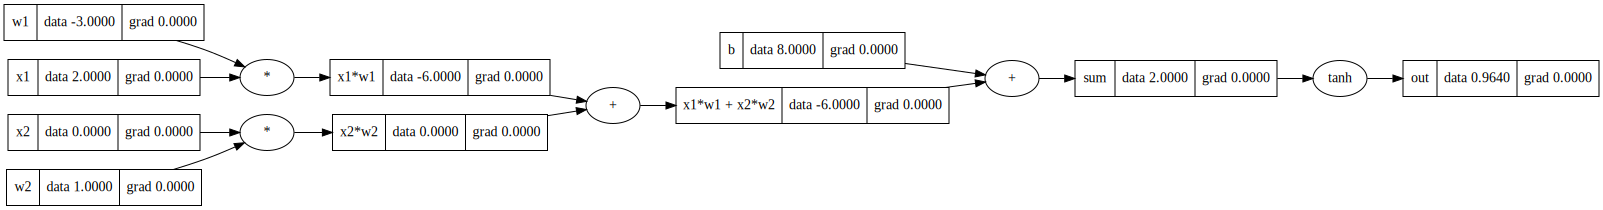

In [15]:
# inputs
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(8, label='b')
# calculating the sum step by step
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
sum = x1w1x2w2 + b; sum.label = 'sum'
out = sum.tanh(); out.label = 'out'

#draw_dot(sum)
draw_dot(out)